# Dos masas acopladas

In [0]:
import numpy as np
import timeit

In [0]:
k1 = 2
k2= 5
k3 = 3.5
m1= 1.0
m2= 1.0
def Q_Dot(Q):
    '''Regreesa la derivada del vector Q'''
    x1, p1, x2, p2  = Q[0],Q[1],Q[2],Q[3]
    x1_dot = p1/m1
    x2_dot = p2/m2
    p1_dot = -x1*(k1+k2)+k2*x2
    p2_dot = k2*x1 - x2*(k2+k3)
    energia = 0.5*m1*x1_dot**2 + 0.5*m2*x2_dot**2 + 0.5*k1*x1**2 + 0.5*k3*x2**2 + 0.5*k2*(x2-x1)**2
    #print(energia)
    return np.asarray([x1_dot,p1_dot,x2_dot,p2_dot])

In [0]:
def paso_euler(f, y_n, t_n, dt):
    '''tomar un paso del metodo de euler
    y_n valor actual del vector al tiempo t=t_n
    f- funcion que calcula la dervivada de y(t)
    '''
    y_dot = f(t_n, y_n)
    y_n_mas_1 = y_n + dt*y_dot
    return y_n_mas_1

In [0]:

def integrador_simple(f, t, y_0, dt):
    t_0, t_f = t
    n = int((t_f-t_0)/dt)
  
    d = len(y_0)
  
    y_tray= np.zeros((n+1, d))
    energia= np.zeros(n+1)
  
    t = np.linspace(t_0, t_f, n+1) #hacer una particion 
  
    y_tray[0,:] = y_0
  
    for i in range(n):
        y_tray[i+1,:] = paso_euler(f, y_tray[i,:], t[i], dt)
    return t, y_tray


In [0]:
def Q_Dot_t(t,y):
    return Q_Dot(y)

In [0]:
import matplotlib.pyplot as plt

In [21]:
t, Q_Tra = integrador_simple(Q_Dot_t, [0,100], [0.5,-0.5,0.,0.], 0.00005)
print(t, Q_Tra)

[0.000000e+00 5.000000e-05 1.000000e-04 ... 9.999990e+01 9.999995e+01
 1.000000e+02] [[ 5.00000000e-01 -5.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 4.99975000e-01 -5.00175000e-01  0.00000000e+00  1.25000000e-04]
 [ 4.99949991e-01 -5.00349991e-01  6.25000000e-09  2.49993750e-04]
 ...
 [ 3.12157304e-01 -5.25421020e-01 -1.92753026e-01 -4.78241066e-01]
 [ 3.12131033e-01 -5.25578463e-01 -1.92776938e-01 -4.78081106e-01]
 [ 3.12104755e-01 -5.25735903e-01 -1.92800842e-01 -4.77921143e-01]]


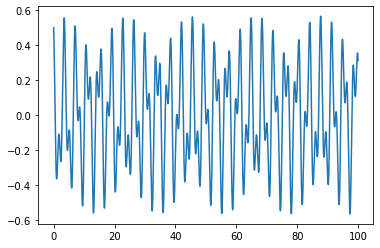

In [22]:
plt.plot(t, Q_Tra[:,0]);

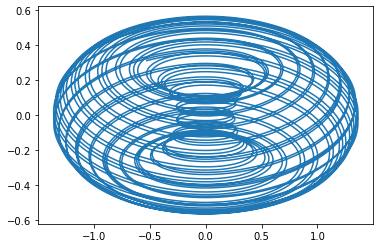

In [23]:
plt.plot(Q_Tra[:,1], Q_Tra[:,0]);

# N masas 

In [0]:
k = 3
m=[1.0,1.0,1.0,1.0,1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
def Q_Dot_N_masas(Q):
    '''Regreesa la derivada del vector Q'''
    n = len(Q)
    x=np.zeros(n+1)
    p=np.zeros(n+1)
    x_dot=np.zeros(n+1)
    p_dot=np.zeros(n+1)
    for i in range(n):
        x[i] = 2*Q[i]
        p[i] = 2*Q[i]+1
    for i in range(n):
        x_dot[i] = p[i]/m[i]
        if i==0:
            p_dot[i] = k*x[i+1]-2*x[i]*k
        if i==n:
            p_dot[i] = k*x[n-1]-2*x[n]*k
        else:
            p_dot[i] = k*(x[i-1]+x[i+1])-2*x[i]*k
    return np.asarray([x_dot,p_dot])

In [0]:
def paso_euler(f, y_n, t_n, dt):
    '''tomar un paso del metodo de euler
    y_n valor actual del vector al tiempo t=t_n
    f- funcion que calcula la dervivada de y(t)
    '''
    y_dot = f(t_n, y_n)
    y_n_mas_1 = y_n + dt*y_dot
    return y_n_mas_1

In [0]:
def integrador_simple_N_masas(f, t, y_0, dt):
    t_0, t_f = t
    n = int((t_f-t_0)/dt)
  
    d = len(y_0)
  
    y_tray= np.zeros((n+1, d))
    energia= np.zeros(n+1)
  
    t = np.linspace(t_0, t_f, n+1) #hacer una particion 
  
    y_tray[0,:] = y_0
  
    for i in range(n):
        y_tray[i+1,:] = paso_euler(f, y_tray[i,:], t[i], dt)
        
    
    return t, y_tray


In [0]:
def Q_Dot_t_N_masas(t,y):
    return Q_Dot_N_masas(y)

In [30]:
t, Q_Tra_N = integrador_simple_N_masas(Q_Dot_t_N_masas, [0,100], [0.5,-0.5,0.,0.], 0.00005)
print(t, Q_Tra_N)

ValueError: ignored